In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/5/data/gender

/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/5/data/gender


In [0]:
import pandas as pd 
import numpy as np
from skimage import io
data=pd.read_csv('a943287.csv')
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


In [0]:
data_male=data[data['please_select_the_gender_of_the_person_in_the_picture']=='male']
data_female=data[data['please_select_the_gender_of_the_person_in_the_picture']=='female']
final_data=pd.concat([data_male[:1000],data_female[:1000]], axis=0).reset_index(drop=True) #아래로 갖다 붙임. (axis=0)
final_data.shape

(2000, 10)

In [0]:
x=[]
y=[]
for i in range(final_data.shape[0]):

    try:
        image=io.imread(final_data.loc[i]['image_url']) #url 에 있는 데이터를 읽어서 불러들인 뒤, 변수에 저장.
        if (image.shape==(300,300,3)): #
            x.append(image) #image누적
            y.append(final_data.loc[i]['please_select_the_gender_of_the_person_in_the_picture']) # male 혹은 female로 불러들임.
            
        if i % 10 ==0:
            print('%.1f' % (i/len(range(final_data.shape[0]))*100),'%',sep='')

    except:
        continue 
        
# try & except는 불러들이는 과정에서 에러메세지가 떠서 작업을 중단할때, 
# 그만 둘 필요없이 계속 불러들이기를 원할때 주로 사용함.
# 에러가 있는 경우는 상당히 많다. (size에 맞지 않는 경우 등..)

0.0%
0.5%
1.0%
1.5%
2.0%
2.5%
3.0%
3.5%
4.0%
4.5%
5.0%
5.5%
6.0%
6.5%
7.0%
7.5%
8.0%
8.5%
9.0%
9.5%
10.0%
10.5%
11.0%
11.5%
12.0%
12.5%
13.0%
13.5%
14.0%
14.5%
15.0%
15.5%
16.0%
16.5%
17.0%
17.5%
18.0%
18.5%
19.0%
19.5%
20.0%
20.5%
21.0%
21.5%
22.0%
22.5%
23.0%
24.0%
24.5%
25.0%
25.5%
26.0%
26.5%
27.0%
27.5%
28.0%
28.5%
29.0%
29.5%
30.0%
30.5%
31.0%
31.5%
32.0%
32.5%
33.0%
33.5%
34.5%
35.0%
35.5%
36.0%
36.5%
37.0%
37.5%
38.0%
38.5%
39.0%
39.5%
40.0%
40.5%
41.0%
41.5%
42.0%
42.5%
43.0%
43.5%
44.0%
44.5%
45.0%
45.5%
46.0%
46.5%
47.0%
47.5%
48.0%
48.5%
49.0%
49.5%
50.0%
50.5%
51.0%
51.5%
52.0%
52.5%
53.0%
53.5%
54.0%
54.5%
55.0%
55.5%
56.0%
56.5%
57.0%
57.5%
58.0%
58.5%
59.0%
59.5%
60.0%
60.5%
61.0%
61.5%
62.0%
62.5%
63.0%
63.5%
64.0%
64.5%
65.0%
65.5%
66.0%
66.5%
67.0%
67.5%
68.0%
68.5%
69.0%
69.5%
70.0%
70.5%
71.0%
71.5%
72.0%
72.5%
73.0%
73.5%
74.0%
75.0%
75.5%
76.0%
76.5%
77.0%
77.5%
78.0%
78.5%
79.0%
79.5%
80.0%
80.5%
81.0%
81.5%
82.0%
82.5%
83.0%
83.5%
84.0%
84.5%
85.0%
85.5%
86.0%


In [0]:
#### 참고1 
import pandas as pd
import numpy as np

x = np.array(x)
y = np.array(y)

xx=x.reshape(-1,300*300*3)
xx=xx.T #행이 너무김.

xx=pd.DataFrame(xx)
yy=pd.DataFrame(yy)


xx.to_csv('x.csv')
yy.to_csv('y.csv')

In [0]:
#### 참고2 (이걸실행)

import pandas as pd
import numpy as np

x = pd.read_csv('x.csv',index_col=0)
x = x.T
y = pd.read_csv('y.csv',index_col=0)

x = np.array(x)
x = x.reshape(-1,300,300,3)
y = np.array(y)

In [0]:
#!pip install opencv-python
import cv2 # image size 조절 
import numpy as np
x2=[]
y2=[]
for i in range(len(x)):
    img2=cv2.resize(x[i],(50,50)) # resize한것들을 새로운 변수 x2에 다시 만들어냄.
    x2.append(img2)
    img_label=np.where(y[i]=='male',1,0) # y[i]가 male이면 img_labe에 1저장 , 그렇지않으면 0저장
    y2.append(img_label)
    
# 이렇게 만든 데이터는 numpy 데이터가 아니다. list임.
# 이는 type을 사용하면 알 수 있음.

In [0]:
# 따라서 numpy 데이터로 변환.
# 딥러닝은 array로 바꿔야함.

x2=np.array(x2)
print(x2.shape)
y1=np.array(y2)
x1=x2.astype('float32')/255. # normalization을 시킨것.
#다시 x1,y1에 할당

#2천개중 1745개만 통과한것임을 알 수 있음.

(1744, 50, 50, 3)


In [0]:
#기억하기 sklear.model_selection.train_test_split 
# 이렇게 쪼갠다.

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.1,random_state=1, stratify=y) # (train/test),(train/test) 로 구분됨.

# 10% 쪼갤때는, 0과 1의 비율이 y를 따라가게 쪼갠다는 의미임.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1569, 50, 50, 3) (175, 50, 50, 3) (1569,) (175,)


In [0]:
#### 참고1 
import pandas as pd
import numpy as np

x_train2=x_train.reshape(-1,50*50*3)
x_test2=x_test.reshape(-1,50*50*3)


x_train2=pd.DataFrame(x_train2)
x_test2=pd.DataFrame(x_test2)
y_train2=pd.DataFrame(y_train)
y_test2=pd.DataFrame(y_test)


x_train2.to_csv('x_train.csv')
x_test2.to_csv('x_test.csv')
y_train2.to_csv('y_train.csv')
y_test2.to_csv('y_test.csv')

In [0]:
#### 참고2

import pandas as pd
import numpy as np

x_train = pd.read_csv('x_train.csv',index_col=0)
x_test = pd.read_csv('x_test.csv',index_col=0)
y_train = pd.read_csv('y_train.csv',index_col=0)
y_test = pd.read_csv('y_test.csv',index_col=0)

In [0]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7460,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.341176,0.321569,0.305882,0.200000,0.180392,0.164706,0.243137,0.223529,0.207843,0.278431,0.258824,0.243137,0.141176,0.121569,0.105882,0.164706,0.145098,0.129412,0.196078,0.176471,0.160784,0.180392,0.160784,0.145098,0.149020,0.129412,0.113725,0.356863,0.337255,0.321569,0.223529,0.203922,0.188235,0.184314,0.172549,0.152941,0.160784,0.149020,0.129412,0.113725,...,0.376471,0.223529,0.203922,0.188235,0.141176,0.121569,0.105882,0.278431,0.258824,0.243137,0.266667,0.235294,0.223529,0.458824,0.427451,0.415686,0.172549,0.141176,0.129412,0.231373,0.200000,0.188235,0.403922,0.372549,0.360784,0.576471,0.545098,0.533333,0.372549,0.341176,0.329412,0.403922,0.372549,0.360784,0.741177,0.709804,0.698039,0.643137,0.611765,0.600000
1,0.258824,0.043137,0.031373,0.282353,0.043137,0.039216,0.278431,0.050980,0.043137,0.282353,0.043137,0.039216,0.282353,0.047059,0.043137,0.282353,0.047059,0.043137,0.282353,0.047059,0.043137,0.282353,0.047059,0.043137,0.286275,0.047059,0.043137,0.286275,0.047059,0.043137,0.282353,0.043137,0.039216,0.282353,0.043137,0.039216,0.286275,0.047059,0.043137,0.286275,...,0.639216,0.164706,0.478431,0.643137,0.141176,0.301961,0.427451,0.305882,0.188235,0.184314,0.356863,0.203922,0.168627,0.278431,0.176471,0.160784,0.466667,0.431373,0.419608,0.694118,0.678431,0.666667,0.756863,0.741177,0.729412,0.800000,0.784314,0.772549,0.819608,0.803922,0.792157,0.831373,0.815686,0.803922,0.831373,0.811765,0.796078,0.827451,0.807843,0.792157
2,0.901961,0.913725,0.933333,0.901961,0.913725,0.933333,0.905882,0.917647,0.937255,0.909804,0.921569,0.941176,0.909804,0.921569,0.941176,0.909804,0.921569,0.941176,0.905882,0.925490,0.941176,0.792157,0.823529,0.850980,0.247059,0.254902,0.266667,0.117647,0.117647,0.121569,0.164706,0.152941,0.172549,0.196078,0.192157,0.211765,0.180392,0.180392,0.188235,0.207843,...,0.337255,0.239216,0.243137,0.250980,0.129412,0.133333,0.141176,0.145098,0.145098,0.160784,0.188235,0.184314,0.203922,0.211765,0.223529,0.247059,0.211765,0.211765,0.223529,0.219608,0.219608,0.231373,0.247059,0.266667,0.282353,0.235294,0.235294,0.250980,0.219608,0.227451,0.247059,0.258824,0.270588,0.290196,0.317647,0.325490,0.349020,0.698039,0.545098,0.505882
3,1.000000,0.423529,0.313725,1.000000,0.439216,0.286275,0.956863,0.439216,0.270588,0.988235,0.427451,0.290196,0.980392,0.478431,0.298039,0.913725,0.635294,0.360784,0.905882,0.627451,0.356863,0.913725,0.623529,0.376471,0.917647,0.627451,0.376471,0.913725,0.643137,0.411765,0.890196,0.647059,0.388235,0.917647,0.650980,0.380392,0.933333,0.647059,0.388235,0.901961,...,0.117647,0.737255,0.113725,0.109804,0.749020,0.109804,0.105882,0.760784,0.105882,0.101961,0.792157,0.109804,0.117647,0.811765,0.113725,0.121569,0.839216,0.121569,0.129412,0.843137,0.125490,0.125490,0.862745,0.133333,0.129412,0.870588,0.133333,0.125490,0.886275,0.129412,0.117647,0.909804,0.137255,0.149020,0.905882,0.164706,0.176471,0.796078,0.149020,0.125490
4,0.349020,0.498039,0.690196,0.341176,0.498039,0.698039,0.345098,0.505882,0.709804,0.333333,0.494118,0.698039,0.337255,0.505882,0.713726,0.313725,0.490196,0.709804,0.321569,0.494118,0.725490,0.329412,0.494118,0.709804,0.337255,0.498039,0.709804,0.317647,0.486274,0.698039,0.317647,0.490196,0.705882,0.313725,0.490196,0.713726,0.313725,0.490196,0.713726,0.313725,...,0.027451,0.043137,0.027451,0.015686,0.058824,0.039216,0.023529,0.054902,0.023529,0.003922,0.270588,0.086275,0.066667,0.486274,0.270588,0.223529,0.596078,0.337255,0.305882,0.611765,0.337255,0.298039,0.611765,0.325490,0.298039,0.615686,0.321569,0.298039,0.611765,0.317647,0.294118,0.607843,0.313725,0.290196,0.603922,0.309804,0.286275,0.600000,0.305882,0.282353


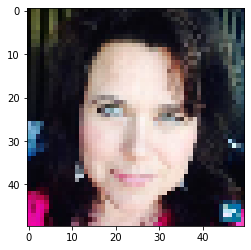

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1]) #실수로만 받기 때문에 나타내려면 실수화 해야한다.
plt.show()

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

#conv1d 2d 3d, maxpooling 1d 2d 3d  다쓴다.

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=[50,50,3]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Flatten()) #평평하게 펴버린다.
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

#2천개의 데이터를 130만개의 모수를 적용.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 256)         2

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])
# sigmoid를 했기 때문에 binary_crossentropy

result=model.fit(x_train,y_train,batch_size=32,epochs=30,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test)
print(score)

Epoch 1/30
50/50 [==============================] - 1s 14ms/step - loss: 0.6946 - acc: 0.5437 - val_loss: 0.6862 - val_acc: 0.5143
Epoch 2/30
50/50 [==============================] - 0s 8ms/step - loss: 0.6472 - acc: 0.6029 - val_loss: 0.6379 - val_acc: 0.6571
Epoch 3/30
50/50 [==============================] - 0s 8ms/step - loss: 0.5887 - acc: 0.6826 - val_loss: 0.6124 - val_acc: 0.7029
Epoch 4/30
50/50 [==============================] - 0s 8ms/step - loss: 0.5671 - acc: 0.7030 - val_loss: 0.6061 - val_acc: 0.6971
Epoch 5/30
50/50 [==============================] - 0s 8ms/step - loss: 0.4714 - acc: 0.7642 - val_loss: 0.7552 - val_acc: 0.6971
Epoch 6/30
50/50 [==============================] - 0s 8ms/step - loss: 0.4330 - acc: 0.7967 - val_loss: 0.5719 - val_acc: 0.6686
Epoch 7/30
50/50 [==============================] - 0s 8ms/step - loss: 0.3899 - acc: 0.8043 - val_loss: 0.6897 - val_acc: 0.7314
Epoch 8/30
50/50 [==============================] - 0s 8ms/step - loss: 0.3316 - acc: 0.8

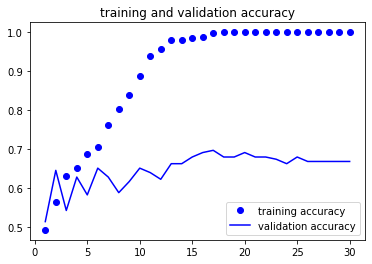

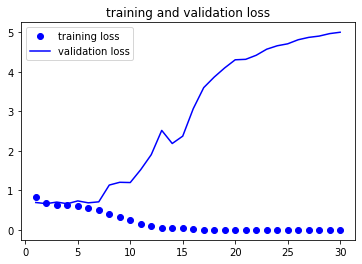

In [0]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

# 아래는 그려본 결과지만, 굳이 그려보지 않아도 당연히 overfitting이 될수밖에 없음을 안다.

In [0]:
import cv2
import numpy as np
x4=[]
y4=[]
for i in range(len(x)):
    img2=cv2.resize(x[i],(300,300))
    x4.append(img2)
    img_label=np.where(y[i]=='male',1,0)
    y4.append(img_label)
x4=np.array(x4)
print(x4.shape)
y3=np.array(y4)
x3=x4.astype('float32')/255.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.1,random_state=1, stratify=y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=[300,300,3]))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])
result=model.fit(x_train,y_train,batch_size=32,epochs=30,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test)


# 300으로 늘리면, 성능이 떨어진다. (같은 convolution , maxpooling 수)
# 대표성이 점점 떨어지기 때문에 그럼.
# 그래서 픽셀의 사이즈를 더 줄여서 압축시켜야함.

print(score)

(1745, 300, 300, 3)
(1570, 300, 300, 3) (175, 300, 300, 3) (1570,) (175,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 74, 74, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 128)       0         
______________________________________________

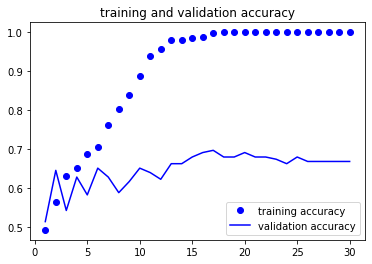

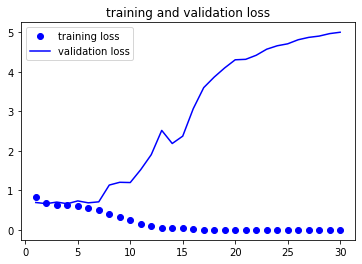

In [0]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
#plt.show()

In [0]:
#이후에는 이전학습을 시행하기 위해, 내장된 함수 VGG16를 불러오자. 
# weights는 imagenet에서 사용한거 그대로 사용. (ILSVRC)

from keras.applications import VGG16
vgg16_model=VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))

#inclue_top option은 위의 convolution 부분만 pre-trained모형을 사용하겠다는 의미. fc층은 내가 구성해서 만들겠다는 뜻.
#즉, 필터만 pre-trained 된 모형을 쓰겠다.
#fc층이 top임. back propagation 기준으로 생각한다.
# 이에따라, input_shape은 include_top이 false일때만 사용가능. 당연하다.


vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [0]:
import cv2
from keras.applications.vgg16 import preprocess_input
x5_vgg16=[]
y5=[]
for i in range(len(x)):
    img=x[i]
    img=preprocess_input(img.reshape(1,300,300,3)) # VGG16모형을 만들때(preprocess_input에서만), input size를 4개로 받게끔 만듦. 그냥 그렇게만들어서 이렇게넣음.
    img_new=vgg16_model.predict(img)
    x5_vgg16.append(img_new)
    img_label=np.where(y[i]=='male',1,0)
    y5.append(img_label)
    
# 이렇게 하면, convolution이 끝나고 난 1745개 데이터들에 대한 feature들이 저장이 됨.
# y는 별로 처리할게 없다.
# 이렇게 x데이터를 VGG16에 넣고 바꿔버림.


In [0]:
x5_vgg16=np.array(x5_vgg16)
print(x5_vgg16.shape)

# 아래의 결과로 나오는 1은 의미가없음. 단순히 input을 위해 그렇게 변경했던거임.
#그래서 이를 빼주기 위해, reshape를 진행한다. 

x5_vgg16=x5_vgg16.reshape(x5_vgg16.shape[0],x5_vgg16.shape[2],x5_vgg16.shape[3],x5_vgg16.shape[4])
y5=np.array(y5)




(1745, 1, 9, 9, 512)


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x5_vgg16,y5,test_size=0.1,random_state=1, stratify=y5)


In [0]:
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Flatten, Dropout
from keras.models import Sequential
modelvgg16=Sequential()
modelvgg16.add(Conv2D(512,(3,3),activation='relu',input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
modelvgg16.add(MaxPooling2D((2,2)))
modelvgg16.add(Flatten())
modelvgg16.add(Dense(512,activation='relu'))
modelvgg16.add(Dropout(0.5))
modelvgg16.add(Dense(1,activation='sigmoid'))
modelvgg16.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 7, 7, 512)         2359808   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 4,720,129
Trainable params: 4,720,129
Non-trainable params: 0
____________________________________________

In [0]:
modelvgg16.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_vgg16=modelvgg16.fit(x_train/np.max(x_train),y_train,batch_size=32,epochs=20,validation_data=(x_test/np.max(x_train),y_test))

# validation accuracy를 보면, 굉장히 성능이 좋아졌음.
# 그래도 아직 overfitting이 되어있음.

Train on 1570 samples, validate on 175 samples
Epoch 1/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.4168 - accuracy: 0.8153 - val_loss: 0.2452 - val_accuracy: 0.9200
Epoch 2/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.1572 - accuracy: 0.9382 - val_loss: 0.2369 - val_accuracy: 0.9314
Epoch 3/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.0575 - accuracy: 0.9828 - val_loss: 0.3223 - val_accuracy: 0.9143
Epoch 4/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.0197 - accuracy: 0.9968 - val_loss: 0.3431 - val_accuracy: 0.9200
Epoch 5/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.4181 - val_accuracy: 0.9143
Epoch 6/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4258 - val_accuracy: 0.9086
Epoch 7/20
1570/1570 [==============================] - 4s 3ms/step - loss: 0.0013 - accu

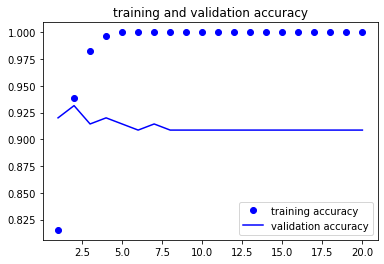

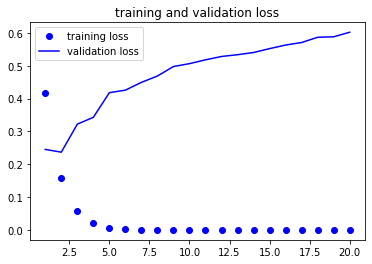

In [0]:
import matplotlib.pyplot as plt
acc=history_vgg16.history['accuracy']
val_acc=history_vgg16.history['val_accuracy']
loss=history_vgg16.history['loss']
val_loss=history_vgg16.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs, val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()